# QoE Prediction 

Work on different datasets found online in order to be ready for our internship 

## Import requirements 

In [135]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn


## Data visualisation 

In [136]:
#Importing the data
data_5g = pd.read_csv('Datasets/output_with_5g.csv')
data = pd.read_csv('Datasets/output.csv')

print(data_5g.head())
print(data.head())
print(data_5g.columns)
print(data.columns)
print(data_5g.info())
print(data.info())
print(data_5g.describe())
print(data.describe())

   Unnamed: 0   mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0           0  2.85       84726         1030        134      19            0
1           1  2.27       53510          540        122      21            0
2           2  2.91       75756         1920         80      16            0
3           3  2.10      131389          690        102      25         1000
4           4  2.24      337008         2230        133      15            0
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['Unnamed: 0', 'mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
Index(['mos', 'throughp

In [137]:
#merge the two datasets into one with no new columns
data_5g = data_5g.drop(columns=['Unnamed: 0'])

frames = [data, data_5g]
data = pd.concat(frames, axis=0, ignore_index=True)
print(data.head())
print(data.columns)
print(data.info())
print(data.describe())



    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mos          42281 non-null  float64
 1   throughput   42281 non-null  int64  
 2   avg_bitrate  42281 non-null  int64  
 3   delay_qos    42281 non-null  int64  
 4   jitter       42281 non-null  int64  
 5   packet_loss  42281 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.9 MB
None


In [138]:
#Data cleaning 
for i in range(len(data)):
    if data['delay_qos'][i] == -1000 \
    or data['delay_qos'][i] == 0 or data['avg_bitrate'][i] == 0:
        data = data.drop([i])
        continue
    if data['jitter'][i] == 0:
        data['jitter'][i] = 1
    if data['jitter'][i] == -1000:
        data['jitter'][i] = 1


print (str(len(data)) + ' Data Loaded Successfully')

42281 Data Loaded Successfully


mos_class
Poor         17098
Fair         12130
Good          7697
Very Good     4279
Excellent     1077
Name: count, dtype: int64
['Fair' 'Poor' 'Good' 'Very Good' 'Excellent']
count     42281
unique        5
top        Poor
freq      17098
Name: mos_class, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 42281 entries, 0 to 42280
Series name: mos_class
Non-Null Count  Dtype 
--------------  ----- 
42281 non-null  object
dtypes: object(1)
memory usage: 330.4+ KB
None
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss mos_class
0  1.96      238472          660        195      18         1000      Fair
1  1.80       70946          300        181      23            0      Poor
2  2.25      316053          460        176      14         1000      Fair
3  1.88      160097          290        152      24            0      Poor
4  3.51      204129          770        104      26            0      Good


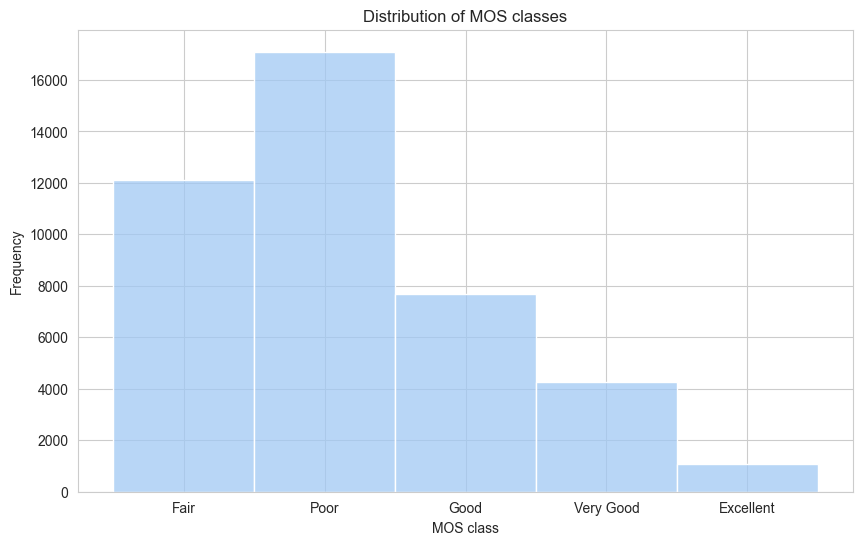

In [139]:
#Classification of the data 
# Poor for MOS between 1.0 and 1.9 
# Fair for MOS between 2.0 and 2.9
# Good for MOS between 3.0 and 3.9
# Very Good for MOS between 4.0 and 4.5
# Excellent for MOS between 4.6 and 5.0

def classify_mos(mos):
    if mos >= 1.0 and mos < 1.9:
        return 'Poor'
    elif mos >= 1.9 and mos < 2.9:
        return 'Fair'
    elif mos >= 2.9 and mos < 3.9:
        return 'Good'
    elif mos >= 3.9 and mos < 4.5:
        return 'Very Good'
    elif mos >= 4.5 and mos <= 5.0:
        return 'Excellent'
    else:
        return 'Unknown'
data['mos_class'] = data['mos'].apply(classify_mos)
print(data['mos_class'].value_counts())
print(data['mos_class'].unique())
print(data['mos_class'].describe())
print(data['mos_class'].info())
print(data.head())

#Data visualization
#Plotting the distribution of the MOS classes
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of MOS classes")
sns.histplot(data['mos_class'])
plt.xlabel("MOS class")
plt.ylabel("Frequency")
plt.show()



In [140]:
#Data exploration
print(data['mos'].describe())
print(data['mos'].isnull().sum())
print(data['avg_bitrate'].describe())
print(data['avg_bitrate'].isnull().sum())
print(data['delay_qos'].describe())
print(data['delay_qos'].isnull().sum())
print(data['jitter'].describe())
print(data['jitter'].isnull().sum())
print(data['packet_loss'].describe())
print(data['packet_loss'].isnull().sum())


count    42281.000000
mean         2.493025
std          0.927674
min          1.130000
25%          1.720000
50%          2.170000
75%          3.160000
max          4.800000
Name: mos, dtype: float64
0
count    42281.000000
mean      1680.057473
std       3867.820219
min         10.000000
25%        320.000000
50%        690.000000
75%       1430.000000
max      69900.000000
Name: avg_bitrate, dtype: float64
0
count    42281.000000
mean       202.232114
std        280.910438
min          1.000000
25%         83.000000
50%        131.000000
75%        184.000000
max       4468.000000
Name: delay_qos, dtype: float64
0
count    42281.000000
mean        33.005014
std         52.059103
min          1.000000
25%          8.000000
50%         17.000000
75%         35.000000
max        897.000000
Name: jitter, dtype: float64
0
count    42281.000000
mean       971.523852
std       1240.811781
min          0.000000
25%          0.000000
50%       1000.000000
75%       2000.000000
max       800

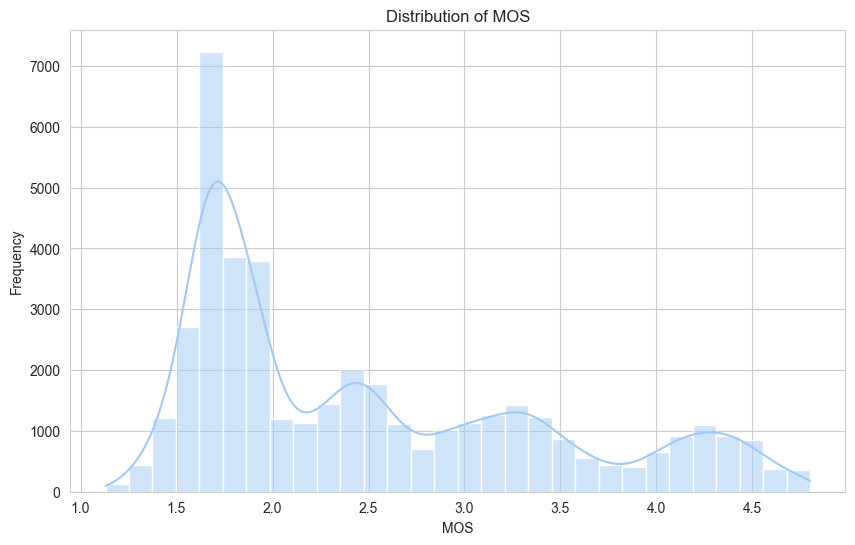

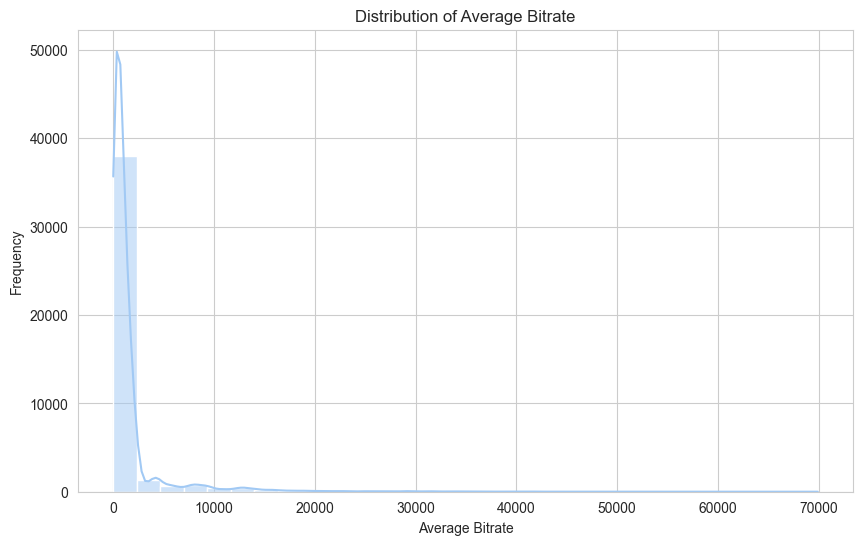

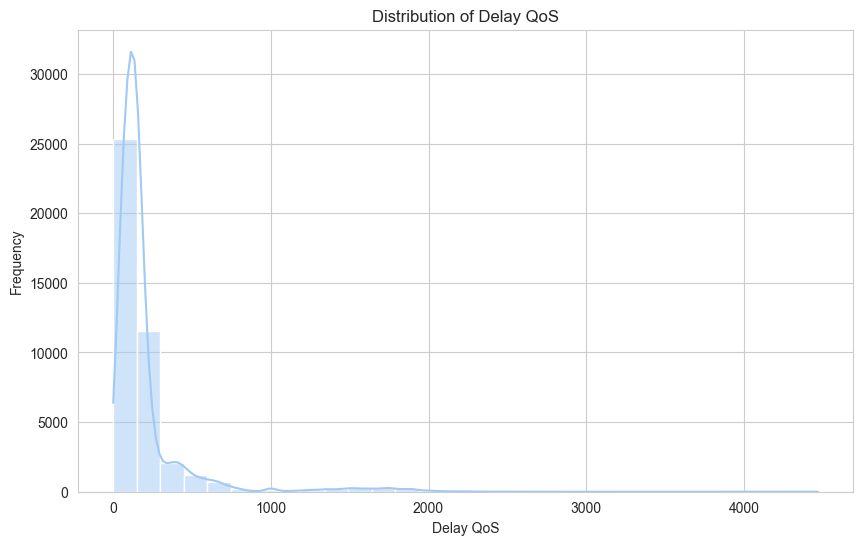

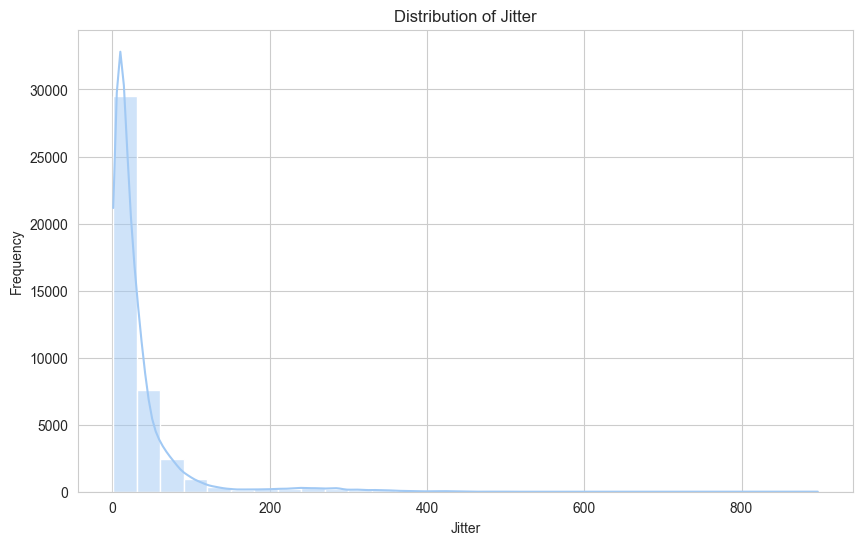

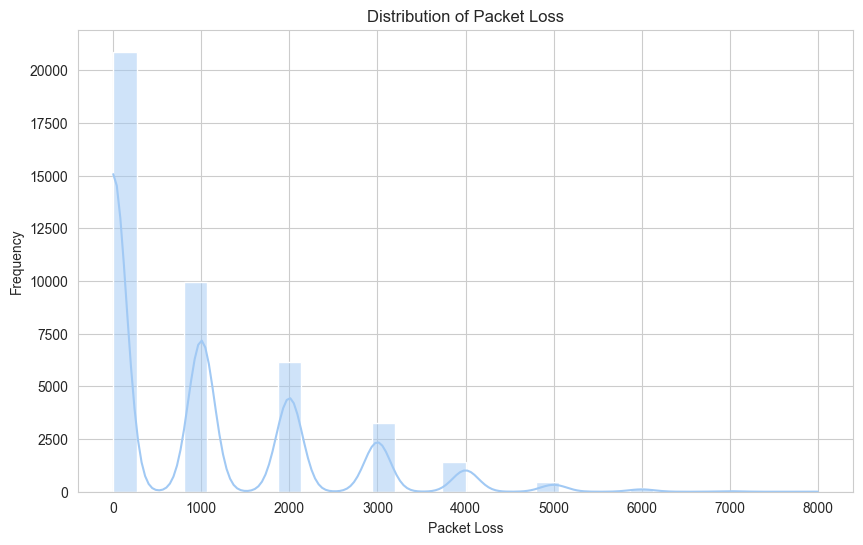

In [141]:
#Data visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of MOS")
sns.histplot(data['mos'], kde=True, bins=30)
plt.xlabel("MOS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Average Bitrate")
sns.histplot(data['avg_bitrate'], kde=True, bins=30)
plt.xlabel("Average Bitrate")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Delay QoS")
sns.histplot(data['delay_qos'], kde=True, bins=30)
plt.xlabel("Delay QoS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Jitter")
sns.histplot(data['jitter'], kde=True, bins=30)
plt.xlabel("Jitter")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Packet Loss")
sns.histplot(data['packet_loss'], kde=True, bins=30)
plt.xlabel("Packet Loss")
plt.ylabel("Frequency")
plt.show()





<Axes: xlabel='avg_bitrate', ylabel='mos'>

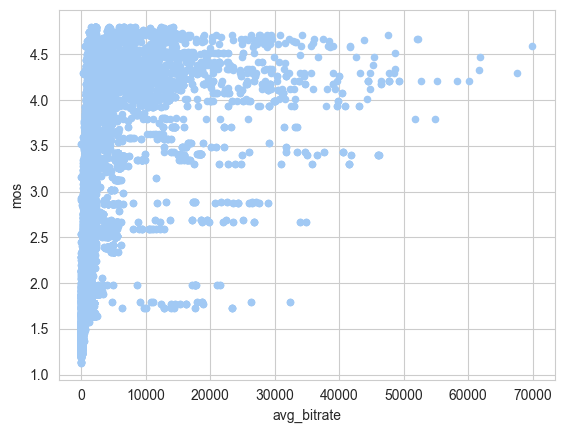

In [142]:
data.plot.scatter(x='avg_bitrate', y='mos')

<Axes: xlabel='delay_qos', ylabel='mos_class'>

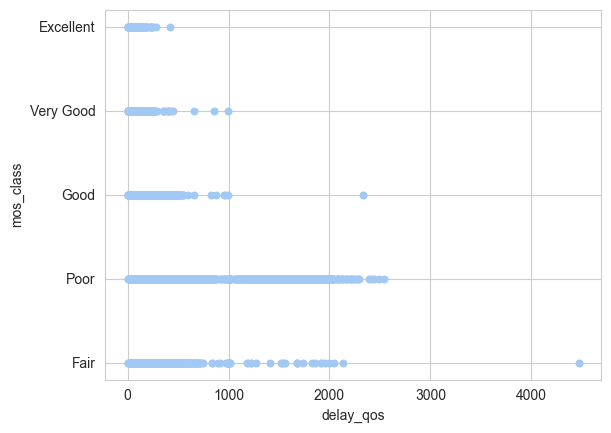

In [143]:
data.plot.scatter(x='delay_qos', y='mos_class')

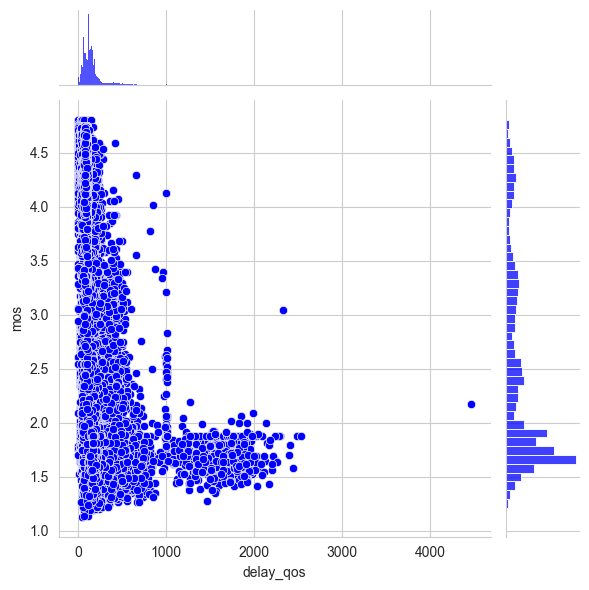

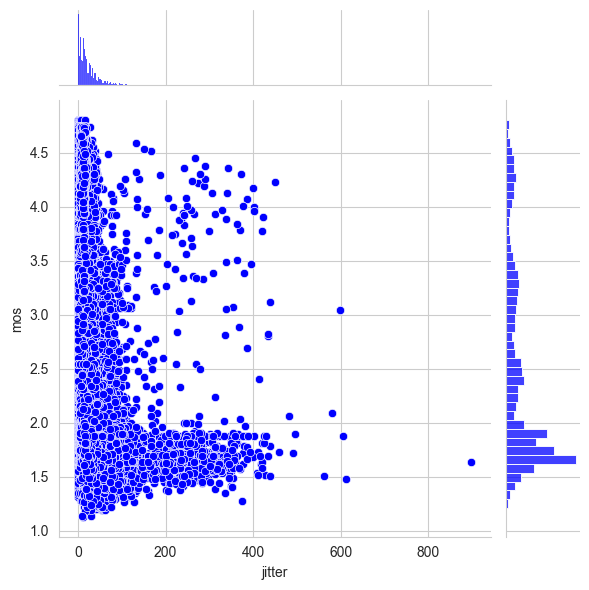

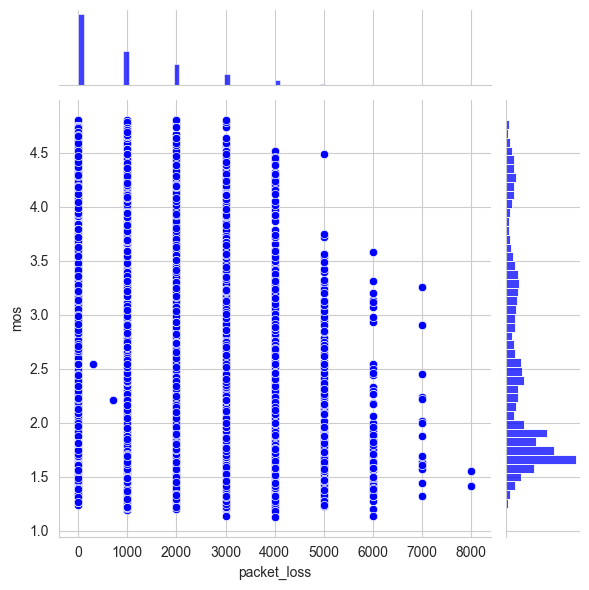

In [144]:
sns.jointplot(x='delay_qos', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='jitter', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='packet_loss', y='mos', data=data, kind='scatter', color='blue')


<Axes: xlabel='mos_class', ylabel='avg_bitrate'>

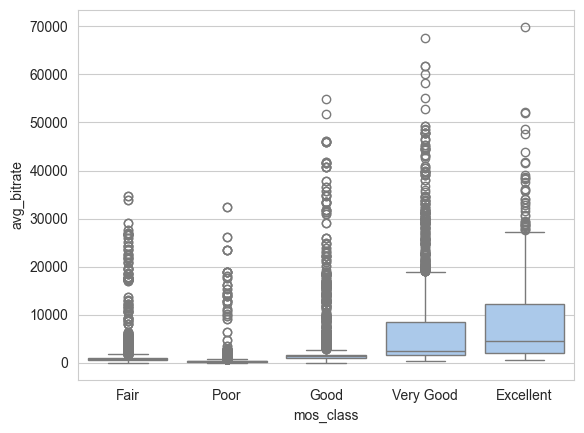

In [145]:
sns.boxplot(x='mos_class', y='avg_bitrate', data=data)


<Axes: xlabel='mos_class', ylabel='delay_qos'>

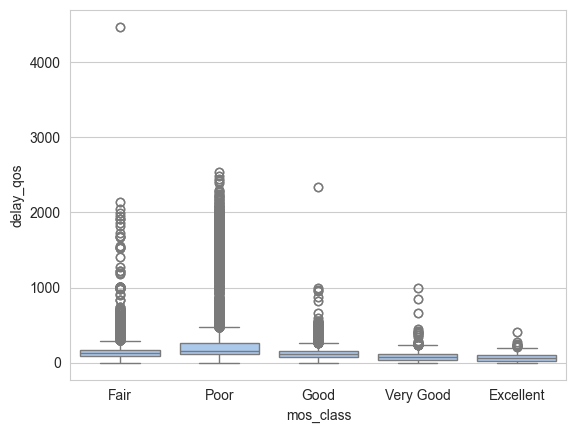

In [146]:
sns.boxplot(x='mos_class', y='delay_qos', data=data)


<Axes: xlabel='mos_class', ylabel='jitter'>

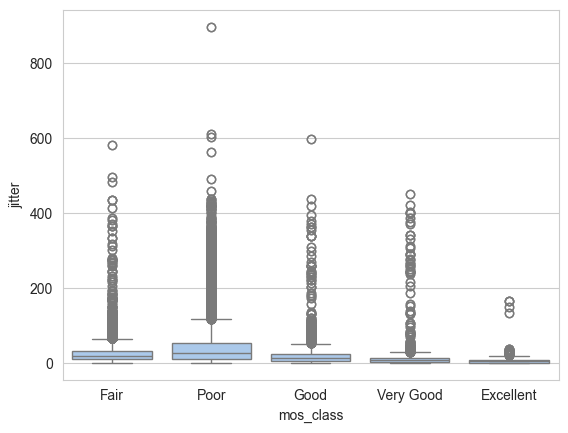

In [147]:
sns.boxplot(x='mos_class', y='jitter', data=data)


<Axes: xlabel='mos_class', ylabel='packet_loss'>

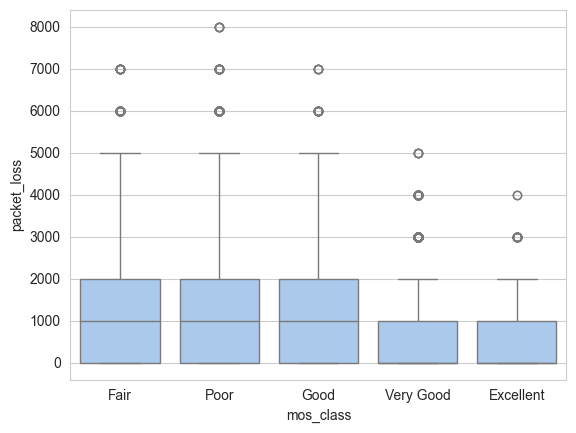

In [148]:
sns.boxplot(x='mos_class', y='packet_loss', data=data)

/var/folders/v_/s9924rt92rq7bt_0_y31thsw0000gn/T/ipykernel_34290/741340446.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="mos_class", y="jitter", data=data, jitter=True, edgecolor="gray")


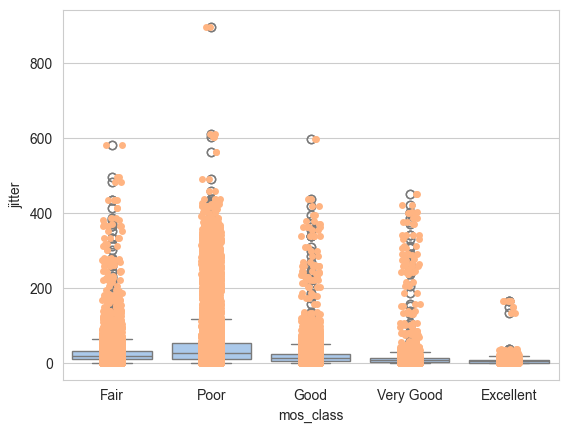

In [149]:
ax = sns.boxplot(x="mos_class", y="jitter", data=data)
ax = sns.stripplot(x="mos_class", y="jitter", data=data, jitter=True, edgecolor="gray")


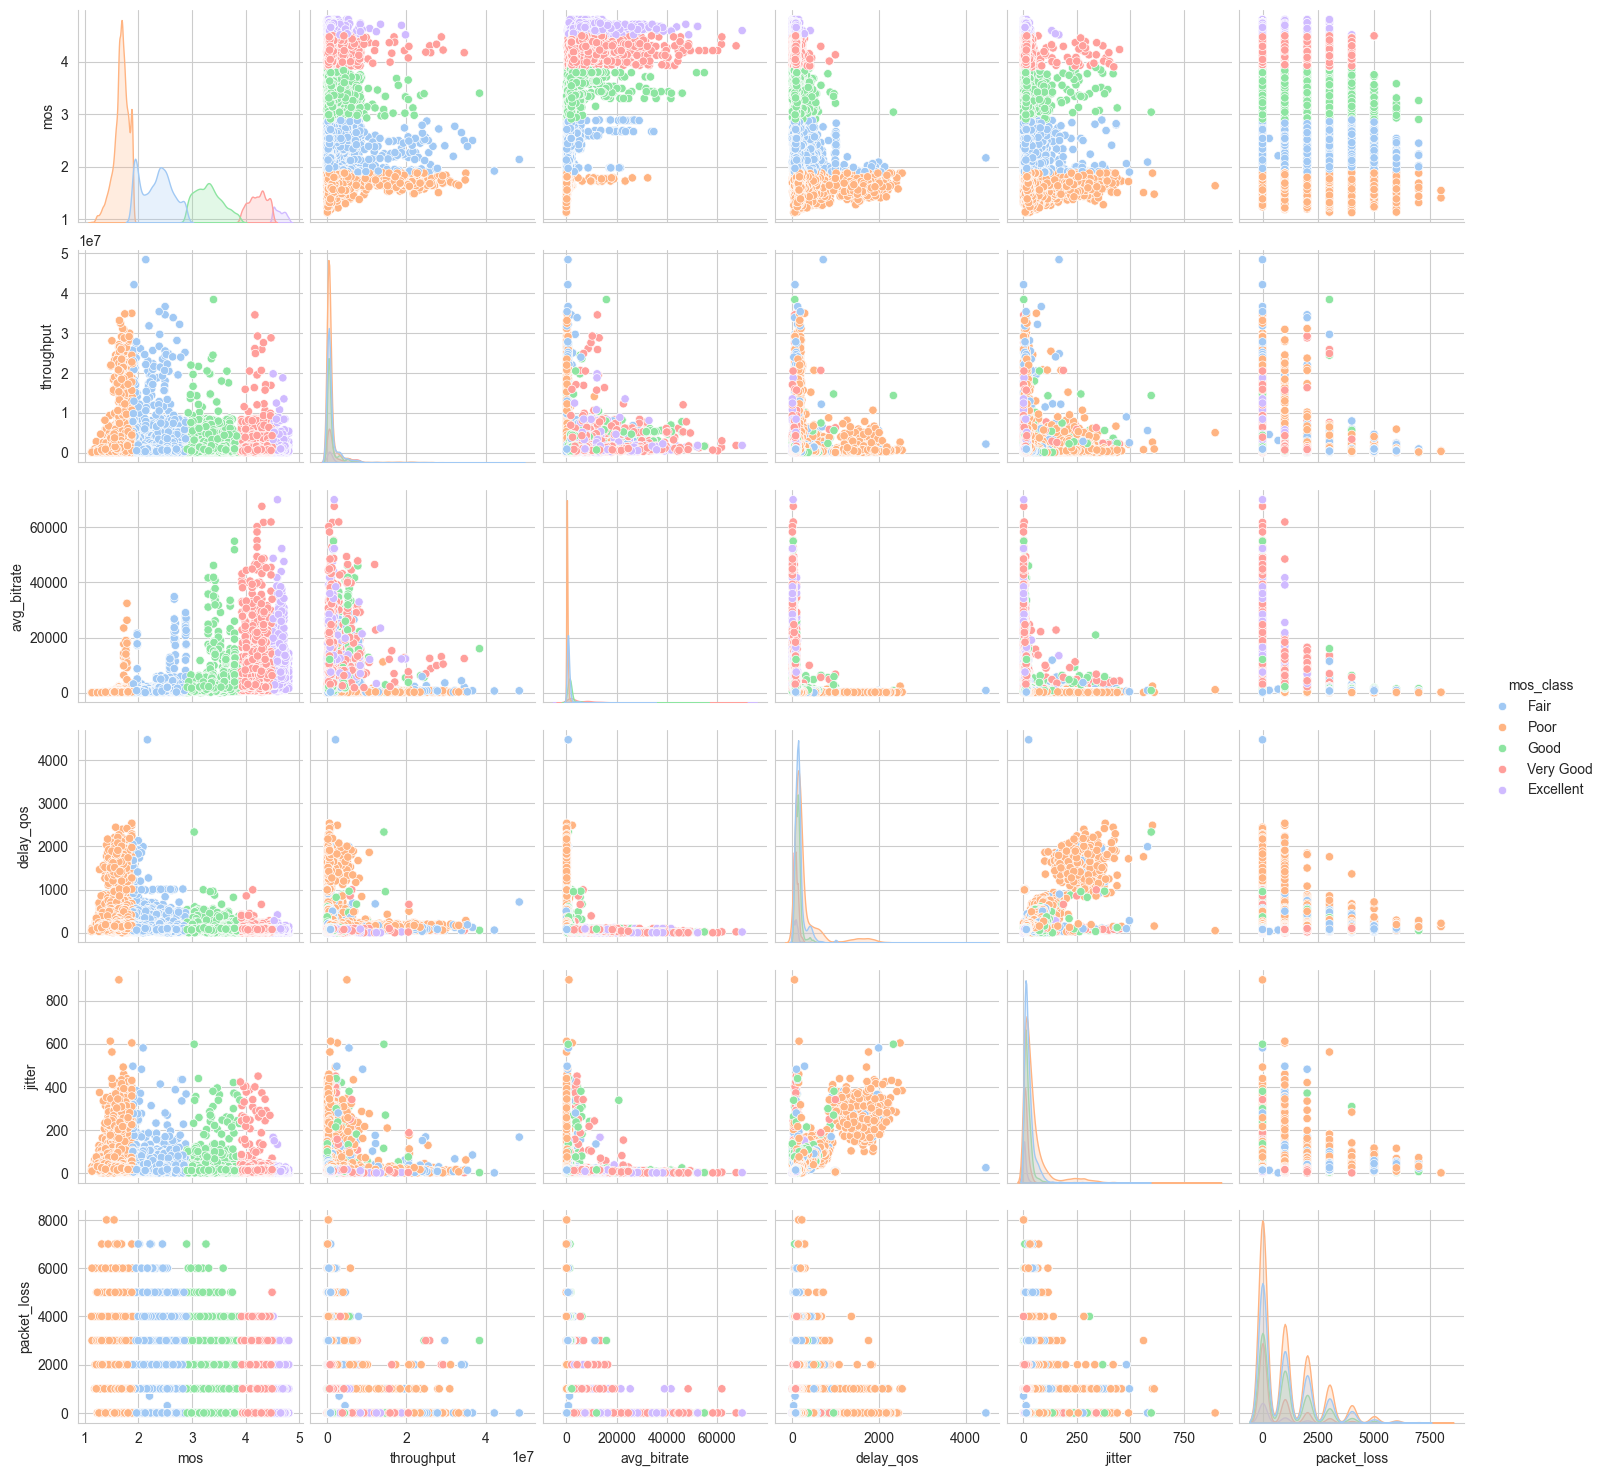

In [150]:
sns.pairplot(data, hue='mos_class', diag_kind='kde', palette='pastel')

<Axes: xlabel='mos_class', ylabel='avg_bitrate'>

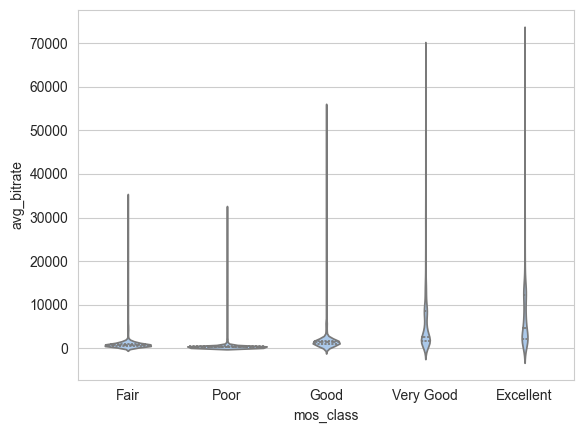

In [151]:
sns.violinplot(x='mos_class', y='avg_bitrate', data=data, inner='quartile')



<Axes: xlabel='mos_class', ylabel='delay_qos'>

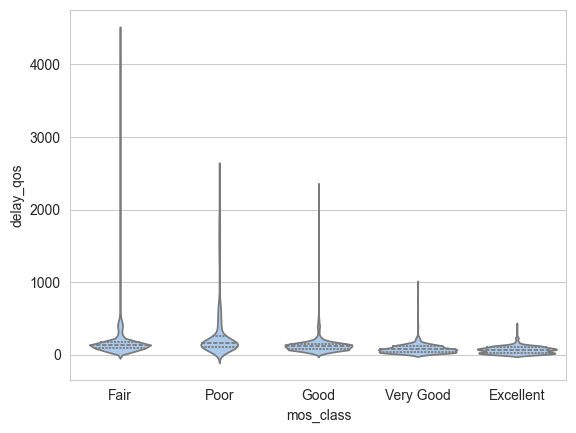

In [152]:
sns.violinplot(x='mos_class', y='delay_qos', data=data, inner='quartile')


<Axes: xlabel='mos_class', ylabel='jitter'>

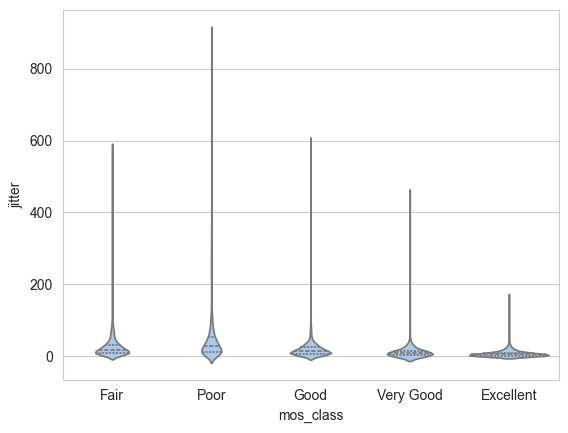

In [153]:
sns.violinplot(x='mos_class', y='jitter', data=data, inner='quartile')


<Axes: xlabel='mos_class', ylabel='packet_loss'>

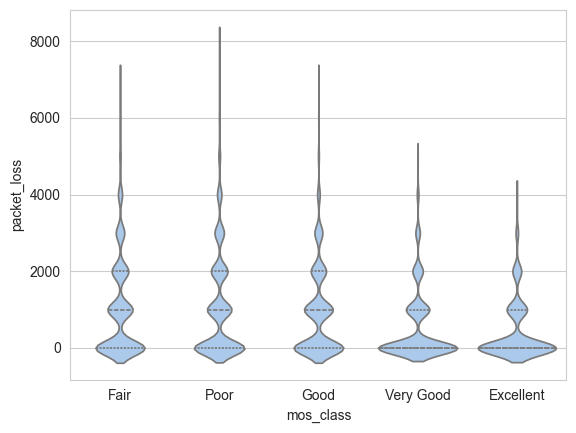

In [154]:
sns.violinplot(x='mos_class', y='packet_loss', data=data, inner='quartile')

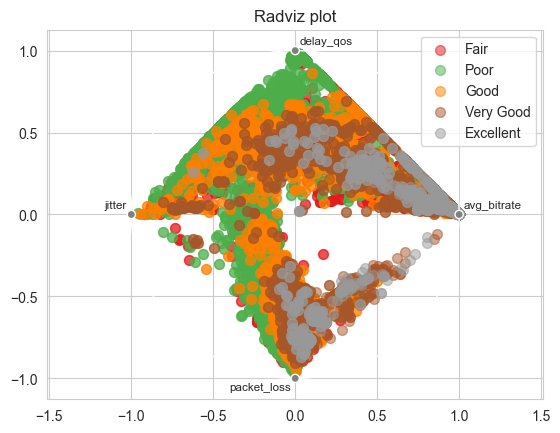

In [155]:
from pandas.plotting import radviz

# Correct usage of radviz with sample data except for the 'mos'
cols = ['avg_bitrate', 'delay_qos', 'jitter', 'packet_loss', 'mos_class']
radviz(data[cols], class_column='mos_class', colormap='Set1', s=50, alpha=0.5)
plt.title("Radviz plot")
plt.show()


## Model training and evaluation 

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [157]:
#Feature engineering
# Adding new features : Derive new features like interactions, olynomials, log etc...

data['delay_log'] = np.log(data['delay_qos']+1)
data['bitrate_log'] = np.log(data['avg_bitrate']+1)

data['packet_loss_squared'] = data['packet_loss'] ** 2
data['throughput_jitter'] = data['throughput'] * data['jitter']
data['delay_jitter'] = data['delay_qos'] * data['jitter']
data['loss_rate'] = data['avg_bitrate'] / (data['packet_loss'] + 1)

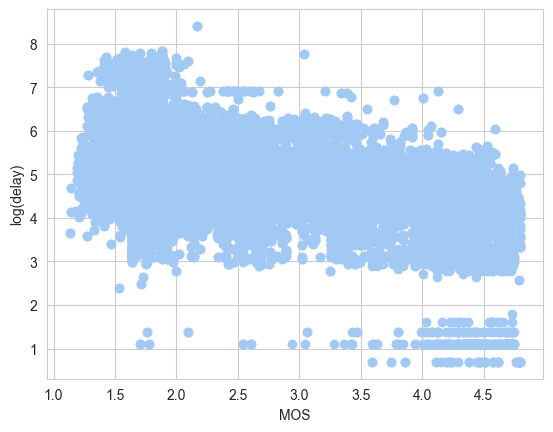

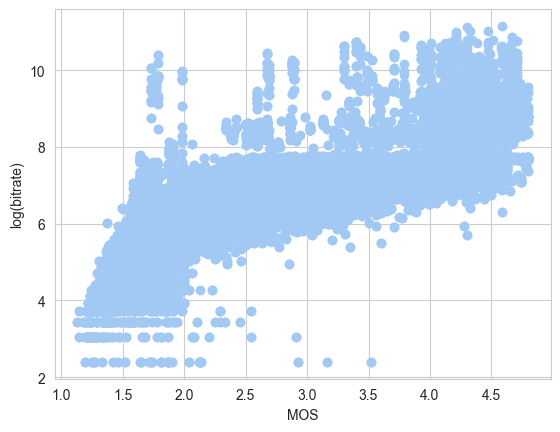

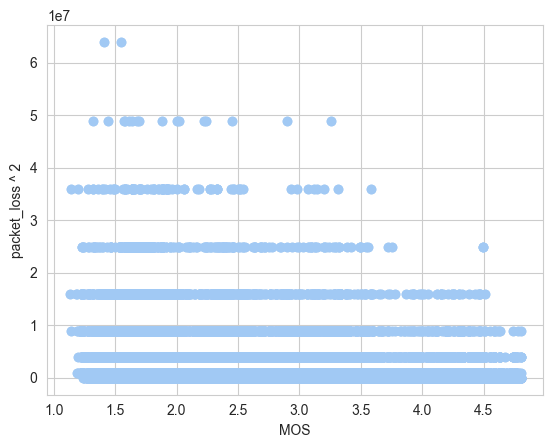

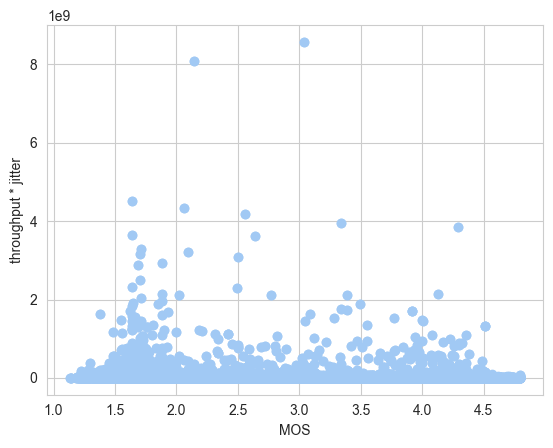

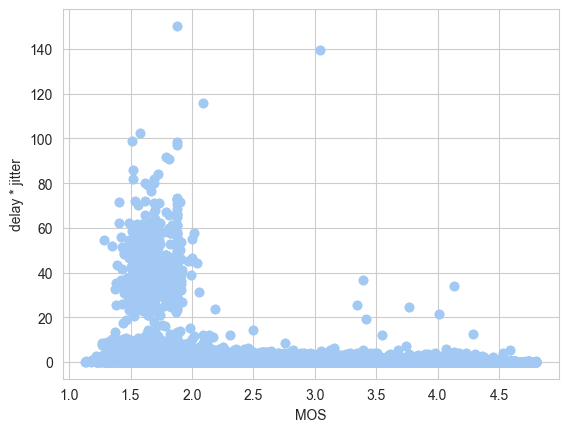

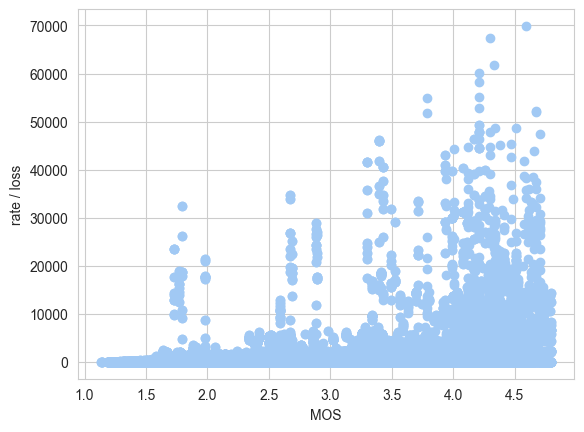

In [158]:

plt.xlabel('MOS')
plt.scatter(data['mos'],data['delay_log'])
plt.ylabel('log(delay)')
plt.xlabel('MOS')
plt.show("r+")
plt.scatter(data['mos'],data['bitrate_log'])
plt.ylabel('log(bitrate)')
plt.xlabel('MOS')
plt.show()
plt.scatter(data['mos'],data['packet_loss_squared'])
plt.ylabel('packet_loss ^ 2')
plt.xlabel('MOS')
plt.show()
plt.scatter(data['mos'],data['throughput_jitter'])
plt.ylabel('throughput * jitter')
plt.xlabel('MOS')
plt.show()
plt.scatter(data['mos'], data['delay_jitter'] / 100 / 100)
plt.ylabel('delay * jitter')
plt.xlabel('MOS')
plt.show()

plt.scatter(data['mos'], data['loss_rate'])
plt.ylabel('rate / loss')
plt.xlabel('MOS')
plt.show()

In [159]:
print(data.head())

    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss mos_class  \
0  1.96      238472          660        195      18         1000      Fair   
1  1.80       70946          300        181      23            0      Poor   
2  2.25      316053          460        176      14         1000      Fair   
3  1.88      160097          290        152      24            0      Poor   
4  3.51      204129          770        104      26            0      Good   

   delay_log  bitrate_log  packet_loss_squared  throughput_jitter  \
0   5.278115     6.493754              1000000            4292496   
1   5.204007     5.707110                    0            1631758   
2   5.176150     6.133398              1000000            4424742   
3   5.030438     5.673323                    0            3842328   
4   4.653960     6.647688                    0            5307354   

   delay_jitter   loss_rate  
0          3510    0.659341  
1          4163  300.000000  
2          2464    0.45954

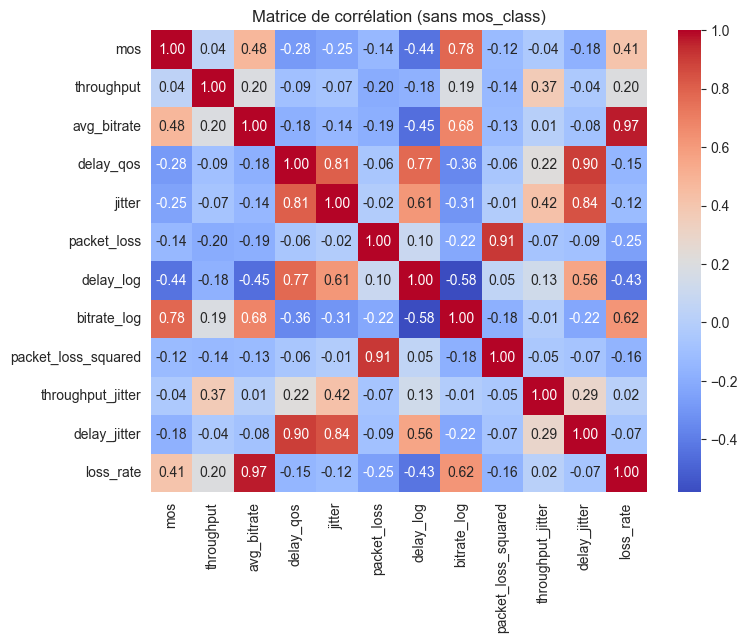

In [160]:
corr_matrix = data.drop(columns='mos_class').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (sans mos_class)")
plt.show()

Random Forest Regressor
Mean Absolute Error: 0.16951970653635254
Mean Squared Error: 0.07195294119947487
Root Mean Squared Error: 0.26824045406961805
R2 Score: 0.9151218541510068


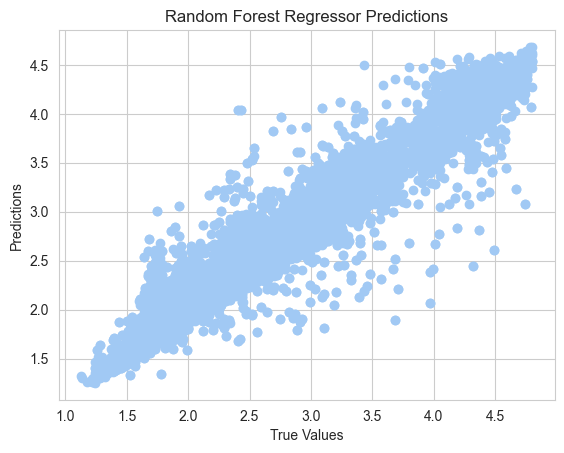

In [163]:
X = data.drop(columns=['mos', 'mos_class'])
y = data['mos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=600, max_depth=48, max_features=0.2)
rf.fit(X_train, y_train)

#Evaluating the model
rf_pred = rf.predict(X_test)
print("Random Forest Regressor")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))
plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions')
plt.show()

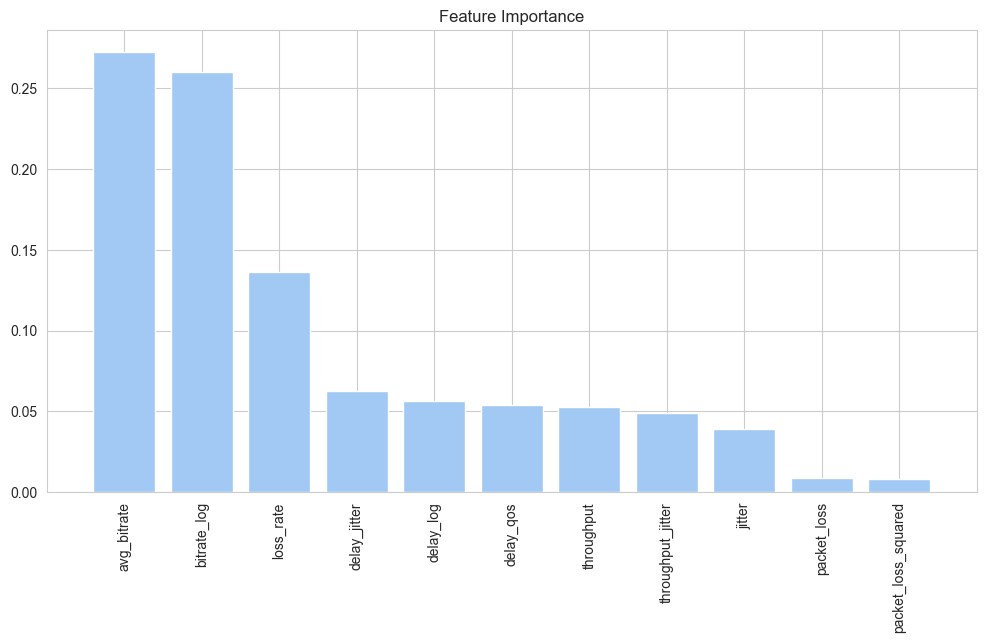

In [164]:
#Feature importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


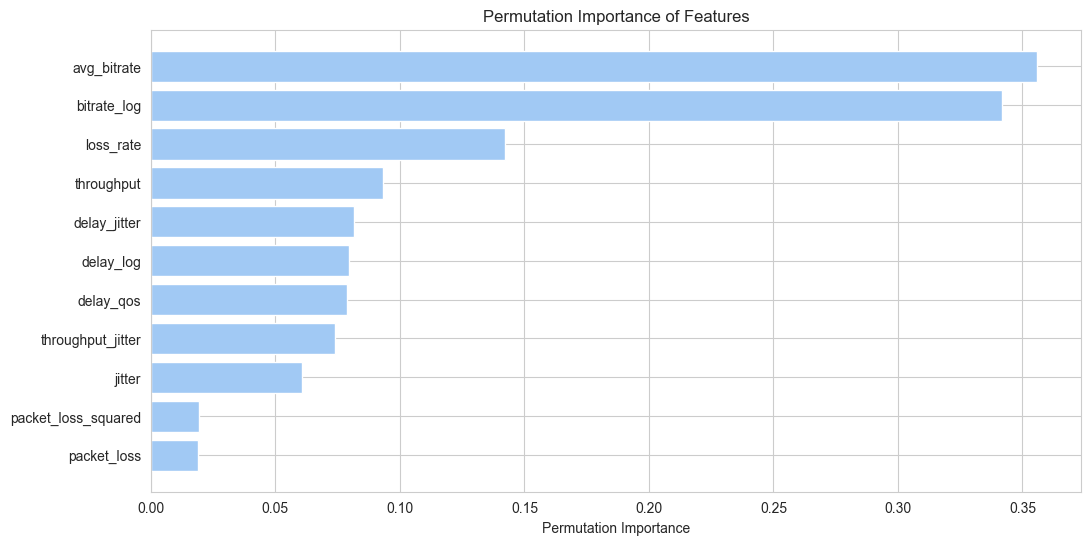

In [165]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()


Selected features: ['avg_bitrate', 'delay_qos', 'bitrate_log', 'delay_jitter', 'loss_rate']
R2 Score: 0.8995984535257638
RMSE: 0.29174037359175325
MAE: 0.18272564510858738


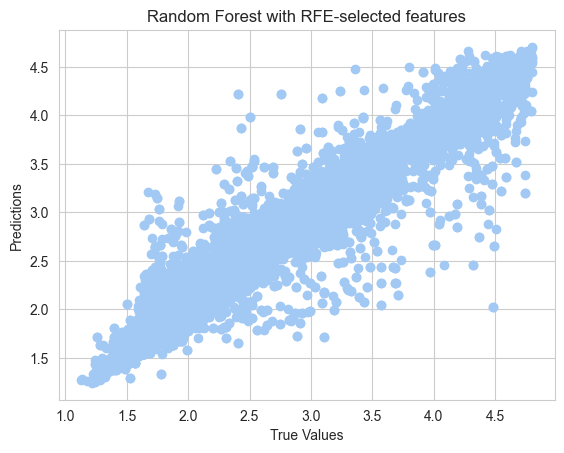

In [166]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
# RFE : ici on teste la sélection des 5 meilleures features
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Features sélectionnées
selected_features = X.columns[rfe.support_]
print("Selected features:", list(selected_features))

# Entraînement sur les features sélectionnées
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

rf.fit(X_train_rfe, y_train)
y_pred = rf.predict(X_test_rfe)

# Évaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest with RFE-selected features')
plt.grid(True)
plt.show()

In [167]:

for k in range(2, X.shape[1] + 1):
    rfe = RFE(estimator=rf, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = X.columns[rfe.support_]

    X_train_k = X_train[selected_features]
    X_test_k = X_test[selected_features]

    rf.fit(X_train_k, y_train)
    y_pred_k = rf.predict(X_test_k)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_k))
    r2 = r2_score(y_test, y_pred_k)

    print(f"{k} features → RMSE: {rmse:.4f}, R²: {r2:.4f}, Features: {list(selected_features)}")


2 features → RMSE: 0.5003, R²: 0.7047, Features: ['avg_bitrate', 'bitrate_log']
3 features → RMSE: 0.3502, R²: 0.8554, Features: ['avg_bitrate', 'bitrate_log', 'delay_jitter']
4 features → RMSE: 0.3323, R²: 0.8697, Features: ['avg_bitrate', 'bitrate_log', 'delay_jitter', 'loss_rate']
5 features → RMSE: 0.2916, R²: 0.8997, Features: ['avg_bitrate', 'delay_qos', 'bitrate_log', 'delay_jitter', 'loss_rate']
6 features → RMSE: 0.2679, R²: 0.9154, Features: ['avg_bitrate', 'delay_qos', 'bitrate_log', 'throughput_jitter', 'delay_jitter', 'loss_rate']
7 features → RMSE: 0.2668, R²: 0.9160, Features: ['avg_bitrate', 'delay_qos', 'delay_log', 'bitrate_log', 'throughput_jitter', 'delay_jitter', 'loss_rate']
8 features → RMSE: 0.2660, R²: 0.9166, Features: ['throughput', 'avg_bitrate', 'delay_qos', 'delay_log', 'bitrate_log', 'throughput_jitter', 'delay_jitter', 'loss_rate']
9 features → RMSE: 0.2664, R²: 0.9163, Features: ['throughput', 'avg_bitrate', 'delay_qos', 'jitter', 'delay_log', 'bitrate_

Random Forest Regressor with Normalization
Mean Absolute Error: 0.1683471487787895
Mean Squared Error: 0.07091801864227407
Root Mean Squared Error: 0.26630437218016917
R2 Score: 0.9163426841308262


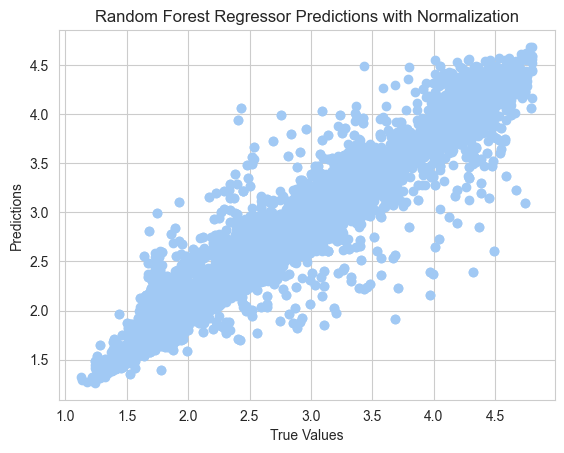

In [171]:
#test de la normalisation
scaler = StandardScaler()
X_best = data[['throughput', 'avg_bitrate', 'delay_qos', 'delay_log', 'bitrate_log', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
X_best = scaler.fit_transform(X_best)
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=600, max_depth=48, max_features=0.2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Regressor with Normalization")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))
plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions with Normalization')
plt.show()

Random Forest Regressor with Normalization
Mean Absolute Error: 0.3971126045119534
Mean Squared Error: 0.2517595851534119
Root Mean Squared Error: 0.5017564998616479
R2 Score: 0.7030157985023513


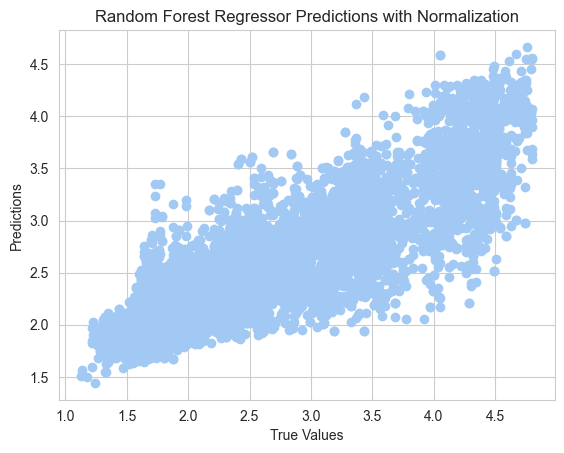

In [172]:
#test de la normalisation
scaler = StandardScaler()
X_best = data[['throughput', 'avg_bitrate', 'delay_qos', 'delay_log', 'bitrate_log', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
X_best = normalize(X_best)
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=600, max_depth=48, max_features=0.2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Regressor with Normalization")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))
plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions with Normalization')
plt.show()